In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#maplotlib inline
import seaborn as sns 

In [2]:
#Define the data for rural consumption
rural_data = {
    'item_category': [
        'cereal', 'cereal substitutes', 'gram', 'pulses and pulse products', 'sugar', 
        'salt', 'milk and milk products', 'vegetables', 'fruits (fresh)', 
        'fruits (dry)', 'egg, fish & meat', 'edible oil', 'spices', 
        'beverages, processed food, etc.', 'food: total', 
        'pan, tobacco & intoxicants', 'fuel and light', 'toilet articles', 
        'other household consumables', 'education', 'medical (hospitalization)', 
        'medical (non-hospitalization)', 'conveyance', 
        'consumer services excluding conveyance', 'entertainment', 'rent', 
        'other taxes & cesses', 'clothing & bedding', 'footwear', 
        'durable goods', 'non-food: total', 'total expenditure'
    ],
    'Goa': [
        263.94, 0, 25.22, 83.57, 34.33, 4.25, 419.12, 298.86, 309.73, 
        89.98, 679.59, 113.59, 180.97, 1038.41, 3541.55, 112.28, 383.08, 224.22, 
        206.78, 113.23, 68.27, 273.72, 896.67, 427.04, 134.10, 147.36, 
        8.29, 252.83, 55.43, 521.71, 3825.02, 7366.57
    ],
    'Gujarat': [
        174.31, 0.23, 15.22, 63.35, 36.68, 2.69, 476.35, 222.91, 86.63, 
        31.91, 47.64, 188.71, 131.21, 389.23, 1867.09, 121.65, 269.34, 95.18, 
        80.27, 73.93, 100.79, 127.21, 320.74, 181.07, 42.89, 22.30, 
        8.50, 202.71, 32.11, 252.52, 1931.20, 3798.30
    ],
    'Haryana': [
        152.03, 0.03, 14.23, 48.55, 49.10, 4.36, 933.28, 273.52, 95.55, 
        47.47, 47.02, 83.53, 163.91, 323.25, 2235.84, 147.52, 333.89, 119.92, 
        102.78, 275.98, 129.83, 196.69, 368.31, 237.48, 41.47, 18.69, 
        0.11, 240.27, 51.80, 358.10, 2622.86, 4858.69
    ],
    'Himachal Pradesh': [
        200.46, 0.01, 15.95, 101.08, 42.40, 2.77, 629.21, 271.10, 131.88, 
        64.10, 135.13, 132.54, 99.10, 587.08, 2412.81, 166.80, 345.47, 205.21, 
        123.97, 293.10, 85.75, 249.06, 408.79, 323.05, 39.87, 65.20, 
        0.62, 331.52, 84.70, 424.94, 3148.04, 5560.85
    ],
    'Jharkhand': [
        197.88, 0, 10.09, 55.55, 15.11, 3.45, 147.29, 167.52, 60.46, 
        21.56, 185.56, 114.62, 86.22, 271.40, 1336.74, 100.33, 196.22, 74.15, 
        66.63, 83.72, 59.08, 120.97, 183.36, 146.38, 19.68, 4.60, 
        2.52, 153.16, 23.91, 191.83, 1426.53, 2763.27
    ],
    'Karnataka': [
        191.46, 0.04, 11.55, 84.67, 36.39, 3.88, 234.08, 220.79, 139.44, 
        59.70, 222.31, 131.03, 138.63, 501.83, 1975.79, 193.88, 256.34, 113.54, 
        120.97, 124.18, 140.26, 160.31, 378.61, 229.88, 68.80, 42.06, 
        13.89, 192.09, 33.02, 353.84, 2421.68, 4397.47
    ]
}

In [3]:
# Define the data for urban consumption
urban_data = {
    'item_category': [
        'cereal', 'cereal substitutes', 'gram', 'pulses and pulse products', 'sugar', 
        'salt', 'milk and milk products', 'vegetables', 'fruits (fresh)', 
        'fruits (dry)', 'egg, fish & meat', 'edible oil', 'spices', 
        'beverages, processed food, etc.', 'food: total', 
        'pan, tobacco & intoxicants', 'fuel and light', 'toilet articles', 
        'other household consumables', 'education', 'medical (hospitalization)', 
        'medical (non-hospitalization)', 'conveyance', 
        'consumer services excluding conveyance', 'entertainment', 'rent', 
        'other taxes & cesses', 'clothing & bedding', 'footwear', 
        'durable goods', 'non-food: total', 'total expenditure'
    ],
    'Goa': [
        291.98, 0, 20.69, 89.96, 30.55, 4.25, 449.93, 280.52, 349.57, 
        72.16, 655.15, 125.95, 178.16, 1561.16, 4110.02, 148.59, 427.70, 251.72, 
        219.89, 205.11, 160.76, 299.63, 923.69, 381.98, 119.13, 467.60, 
        8.91, 322.19, 51.85, 635.09, 4623.84, 8733.87
    ],
    'Gujarat': [
        239.08, 0.34, 18.79, 82.19, 43.44, 4.76, 669.78, 276.02, 152.11, 
        84.25, 77.78, 235.78, 168.94, 727.03, 2780.28, 102.68, 448.14, 203.19, 
        144.53, 351.81, 155.28, 195.55, 604.26, 374.80, 118.29, 279.56, 
        30.02, 314.22, 51.73, 466.38, 3840.44, 6620.72
    ],
    'Haryana': [
        228.22, 0.90, 16.86, 67.76, 50.83, 5.09, 1040.79, 375.45, 184.96, 
        75.25, 85.33, 117.21, 160.83, 738.94, 3148.41, 292.57, 500.26, 198.68, 
        160.88, 492.24, 75.47, 239.56, 633.58, 445.86, 108.02, 561.13, 
        0.51, 390.26, 79.39, 583.68, 4762.10, 7910.51
    ],
    'Himachal Pradesh': [
        268.08, 0, 20.10, 109.72, 39.97, 3.49, 686.09, 314.25, 188.68, 
        113.36, 121.92, 145.10, 124.15, 931.65, 3066.55, 170.30, 422.19, 265.65, 
        134.37, 640.43, 140.83, 263.53, 588.38, 485.04, 77.27, 727.73, 
        2.07, 480.18, 115.97, 494.79, 5008.73, 8075.28
    ],
    'Jharkhand': [
        291.71, 0, 13.37, 74.20, 20.78, 4.35, 330.26, 231.51, 119.21, 
        59.96, 198.52, 159.06, 117.01, 434.79, 2054.73, 82.03, 339.54, 157.74, 
        101.01, 310.74, 132.22, 174.50, 399.74, 262.31, 66.60, 222.68, 
        7.58, 247.50, 41.46, 330.60, 2876.26, 4930.99
    ],
    'Karnataka': [
        252.62, 0.02, 12.40, 90.74, 34.68, 4.42, 332.84, 238.92, 204.37, 
        97.71, 292.38, 147.58, 168.55, 919.69, 2796.93, 201.63, 355.60, 203.32, 
        168.71, 584.58, 133.34, 228.23, 663.53, 480.85, 134.80, 871.73, 
        29.15, 284.57, 51.48, 477.42, 4868.94, 7665.87
    ]
}


In [4]:
# Create pandas DataFrames
rural_df = pd.DataFrame(rural_data)
urban_df = pd.DataFrame(urban_data)

In [5]:
# Set the item_category as the index for easier analysis
rural_df.set_index('item_category', inplace=True)
urban_df.set_index('item_category', inplace=True)

In [6]:
# Display the first few rows
print("Rural consumption data:")
print(rural_df.head())
print("\nUrban consumption data:")
print(urban_df.head())

Rural consumption data:
                              Goa  Gujarat  Haryana  Himachal Pradesh  \
item_category                                                           
cereal                     263.94   174.31   152.03            200.46   
cereal substitutes           0.00     0.23     0.03              0.01   
gram                        25.22    15.22    14.23             15.95   
pulses and pulse products   83.57    63.35    48.55            101.08   
sugar                       34.33    36.68    49.10             42.40   

                           Jharkhand  Karnataka  
item_category                                    
cereal                        197.88     191.46  
cereal substitutes              0.00       0.04  
gram                           10.09      11.55  
pulses and pulse products      55.55      84.67  
sugar                          15.11      36.39  

Urban consumption data:
                              Goa  Gujarat  Haryana  Himachal Pradesh  \
item_category   

In [7]:
# Basic analysis - Calculate food vs non-food percentage for each state
def calculate_food_percentage(df):
    food_total = df.loc['food: total']
    total_exp = df.loc['total expenditure']
    food_percentage = (food_total / total_exp * 100).round(2)
    return food_percentage

rural_food_percentage = calculate_food_percentage(rural_df)
urban_food_percentage = calculate_food_percentage(urban_df)

In [8]:
# Create a DataFrame to compare rural vs urban food expenditure percentage
comparison_df = pd.DataFrame({
    'Rural Food %': rural_food_percentage,
    'Urban Food %': urban_food_percentage,
    'Difference (Rural - Urban)': rural_food_percentage - urban_food_percentage
})

print("\nPercentage of total expenditure spent on food:")
print(comparison_df)


Percentage of total expenditure spent on food:
                  Rural Food %  Urban Food %  Difference (Rural - Urban)
Goa                      48.08         47.06                        1.02
Gujarat                  49.16         41.99                        7.17
Haryana                  46.02         39.80                        6.22
Himachal Pradesh         43.39         37.97                        5.42
Jharkhand                48.38         41.67                        6.71
Karnataka                44.93         36.49                        8.44


In [9]:
# Example visualization: Food vs Non-food expenditure comparison
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [10]:
# Top 5 expenditure categories for each state (excluding totals)
def top_categories(df, state, n=5):
    # Filter out the total categories
    filtered_df = df.drop(['food: total', 'non-food: total', 'total expenditure'])
    # Get top N categories
    top_n = filtered_df[state].nlargest(n)
    return top_n

In [11]:
# Example for one state
print("\nTop 5 expenditure categories in rural Goa:")
print(top_categories(rural_df, 'Goa'))

print("\nTop 5 expenditure categories in urban Goa:")
print(top_categories(urban_df, 'Goa'))


Top 5 expenditure categories in rural Goa:
item_category
beverages, processed food, etc.           1038.41
conveyance                                 896.67
egg, fish & meat                           679.59
durable goods                              521.71
consumer services excluding conveyance     427.04
Name: Goa, dtype: float64

Top 5 expenditure categories in urban Goa:
item_category
beverages, processed food, etc.    1561.16
conveyance                          923.69
egg, fish & meat                    655.15
durable goods                       635.09
rent                                467.60
Name: Goa, dtype: float64


In [12]:
# Function to create a comprehensive analysis for all states
def analyze_state(rural_df, urban_df, state):
    print(f"\n{'='*50}")
    print(f"Analysis for {state}")
    print(f"{'='*50}")

In [13]:
# Example: Analyze data for Haryana
analyze_state(rural_df, urban_df, 'Haryana')

# Or run it for any other state
analyze_state(rural_df, urban_df, 'Goa')


Analysis for Haryana

Analysis for Goa


In [14]:
state = 'Haryana'  # Choose any state from the dataframe columns

# Total expenditure
rural_total = rural_df.loc['total expenditure', state]
urban_total = urban_df.loc['total expenditure', state]
print(f"Total monthly per capita expenditure:")
print(f"  Rural: Rs. {rural_total:.2f}")
print(f"  Urban: Rs. {urban_total:.2f}")
print(f"  Difference: Rs. {urban_total - rural_total:.2f}")

Total monthly per capita expenditure:
  Rural: Rs. 4858.69
  Urban: Rs. 7910.51
  Difference: Rs. 3051.82


In [15]:
# Make sure you have these variables defined first
state = 'Haryana'  # Replace with your chosen state
rural_total = rural_df.loc['total expenditure', state]
urban_total = urban_df.loc['total expenditure', state]

# Food percentage calculation
rural_food_pct = rural_df.loc['food: total', state] / rural_total * 100
urban_food_pct = urban_df.loc['food: total', state] / urban_total * 100
print(f"\nPercentage spent on food:")
print(f"  Rural: {rural_food_pct:.2f}%")
print(f"  Urban: {urban_food_pct:.2f}%")


Percentage spent on food:
  Rural: 46.02%
  Urban: 39.80%


In [16]:
# Make sure 'state' is defined
state = 'Haryana'  # Replace with your chosen state

# Make sure the top_categories function is defined
def top_categories(df, state, n=5):
    # Filter out the total categories
    filtered_df = df.drop(['food: total', 'non-food: total', 'total expenditure'])
    # Get top N categories
    top_n = filtered_df[state].nlargest(n)
    return top_n

# Top 5 categories
print("\nTop 5 expenditure categories (Rural):")
top_rural = top_categories(rural_df, state)
for category, amount in top_rural.items():
    print(f"  {category}: Rs. {amount:.2f}")


Top 5 expenditure categories (Rural):
  milk and milk products: Rs. 933.28
  conveyance: Rs. 368.31
  durable goods: Rs. 358.10
  fuel and light: Rs. 333.89
  beverages, processed food, etc.: Rs. 323.25



Analysis for Haryana
Total monthly per capita expenditure:
  Rural: Rs. 4858.69
  Urban: Rs. 7910.51
  Difference: Rs. 3051.82

Percentage spent on food:
  Rural: 46.02%
  Urban: 39.80%

Top 5 expenditure categories (Rural):
  milk and milk products: Rs. 933.28
  conveyance: Rs. 368.31
  durable goods: Rs. 358.10
  fuel and light: Rs. 333.89
  beverages, processed food, etc.: Rs. 323.25

Top 5 expenditure categories (Urban):
  milk and milk products: Rs. 1040.79
  beverages, processed food, etc.: Rs. 738.94
  conveyance: Rs. 633.58
  durable goods: Rs. 583.68
  rent: Rs. 561.13

Comparison of education expenditure across states:
                   Rural   Urban  Difference  Urban/Rural Ratio
Goa               113.23  205.11       91.88               1.81
Gujarat            73.93  351.81      277.88               4.76
Haryana           275.98  492.24      216.26               1.78
Himachal Pradesh  293.10  640.43      347.33               2.19
Jharkhand          83.72  310.74      227.

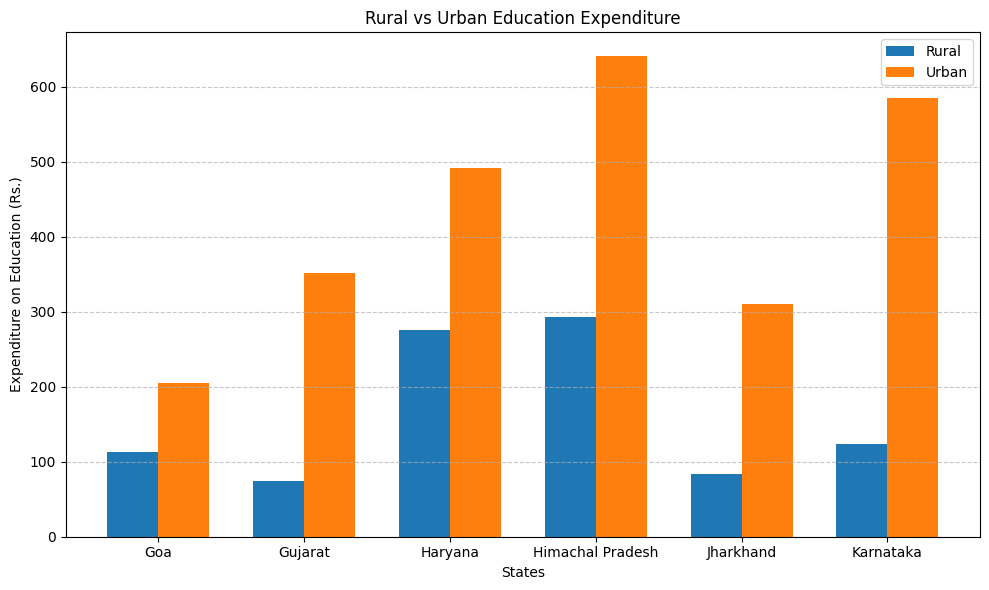

In [17]:
# Make sure the analyze_state function is defined first
def analyze_state(rural_df, urban_df, state):
    print(f"\n{'='*50}")
    print(f"Analysis for {state}")
    print(f"{'='*50}")
    
    # Total expenditure
    rural_total = rural_df.loc['total expenditure', state]
    urban_total = urban_df.loc['total expenditure', state]
    print(f"Total monthly per capita expenditure:")
    print(f"  Rural: Rs. {rural_total:.2f}")
    print(f"  Urban: Rs. {urban_total:.2f}")
    print(f"  Difference: Rs. {urban_total - rural_total:.2f}")
    
    # Food percentage
    rural_food_pct = rural_df.loc['food: total', state] / rural_total * 100
    urban_food_pct = urban_df.loc['food: total', state] / urban_total * 100
    print(f"\nPercentage spent on food:")
    print(f"  Rural: {rural_food_pct:.2f}%")
    print(f"  Urban: {urban_food_pct:.2f}%")
    
    # Top 5 categories
    print("\nTop 5 expenditure categories (Rural):")
    top_rural = top_categories(rural_df, state)
    for category, amount in top_rural.items():
        print(f"  {category}: Rs. {amount:.2f}")
    
    print("\nTop 5 expenditure categories (Urban):")
    top_urban = top_categories(urban_df, state)
    for category, amount in top_urban.items():
        print(f"  {category}: Rs. {amount:.2f}")

# Run analysis for a sample state
analyze_state(rural_df, urban_df, 'Haryana')

# Create a function to compare specific category across all states
def compare_category(rural_df, urban_df, category):
    rural_values = rural_df.loc[category]
    urban_values = urban_df.loc[category]
    
    comparison = pd.DataFrame({
        'Rural': rural_values,
        'Urban': urban_values,
        'Difference': urban_values - rural_values,
        'Urban/Rural Ratio': (urban_values / rural_values).round(2)
    })
    
    return comparison

# Example comparison for education expenditure
education_comparison = compare_category(rural_df, urban_df, 'education')
print("\nComparison of education expenditure across states:")
print(education_comparison)

# Example visualization: Rural vs Urban education expenditure
plt.figure(figsize=(10, 6))
states = rural_df.columns
x = range(len(states))
width = 0.35

plt.bar([i - width/2 for i in x], rural_df.loc['education'], width, label='Rural')
plt.bar([i + width/2 for i in x], urban_df.loc['education'], width, label='Urban')

plt.xlabel('States')
plt.ylabel('Expenditure on Education (Rs.)')
plt.title('Rural vs Urban Education Expenditure')
plt.xticks(x, states)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

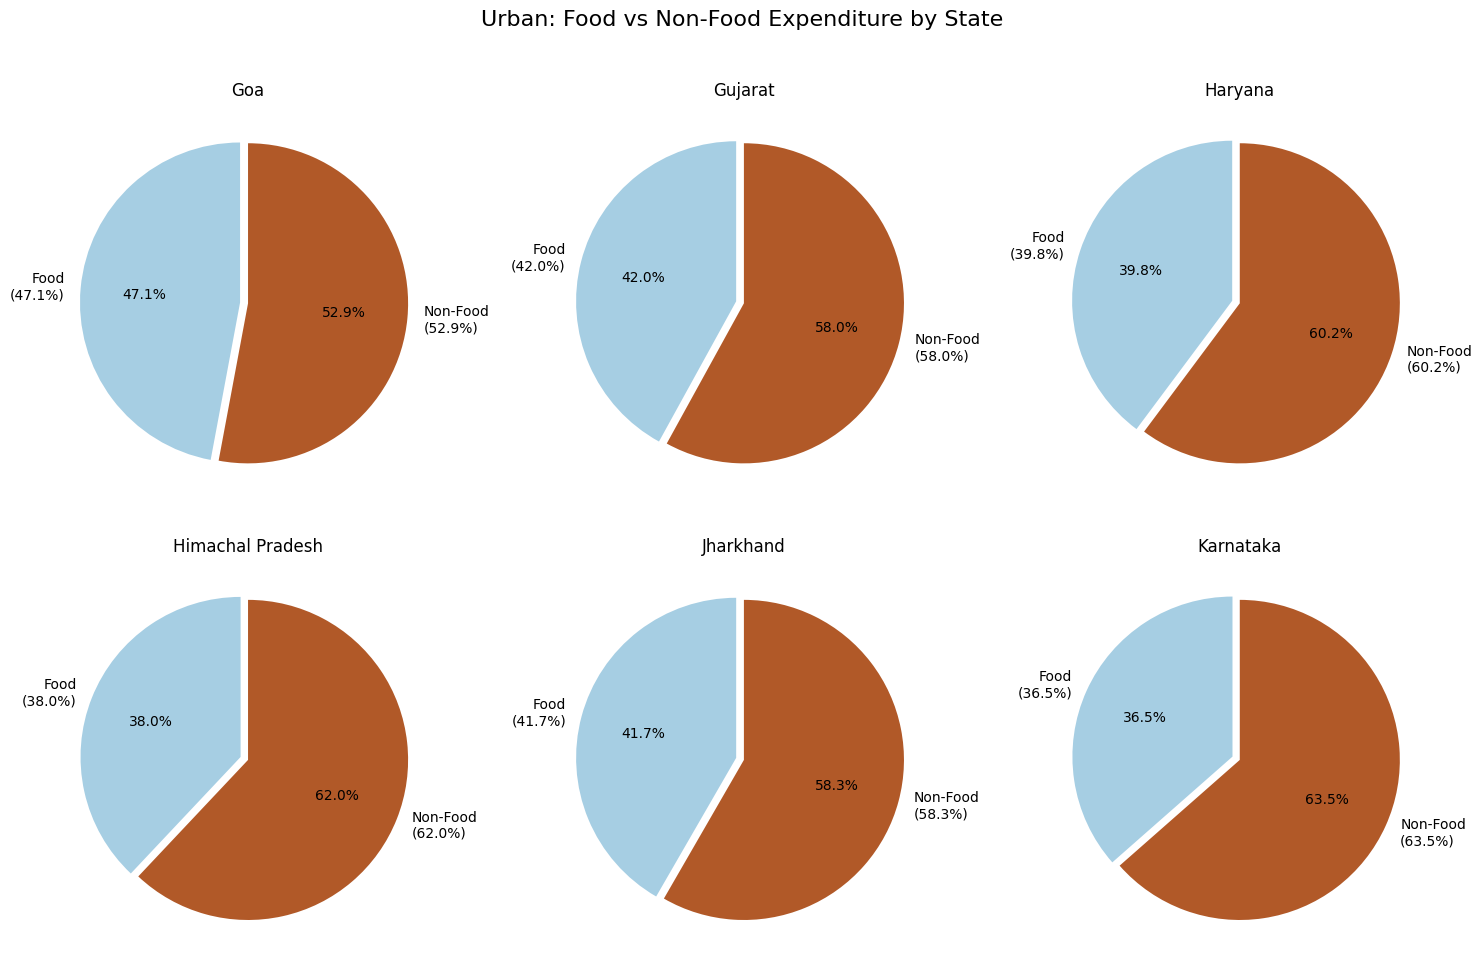

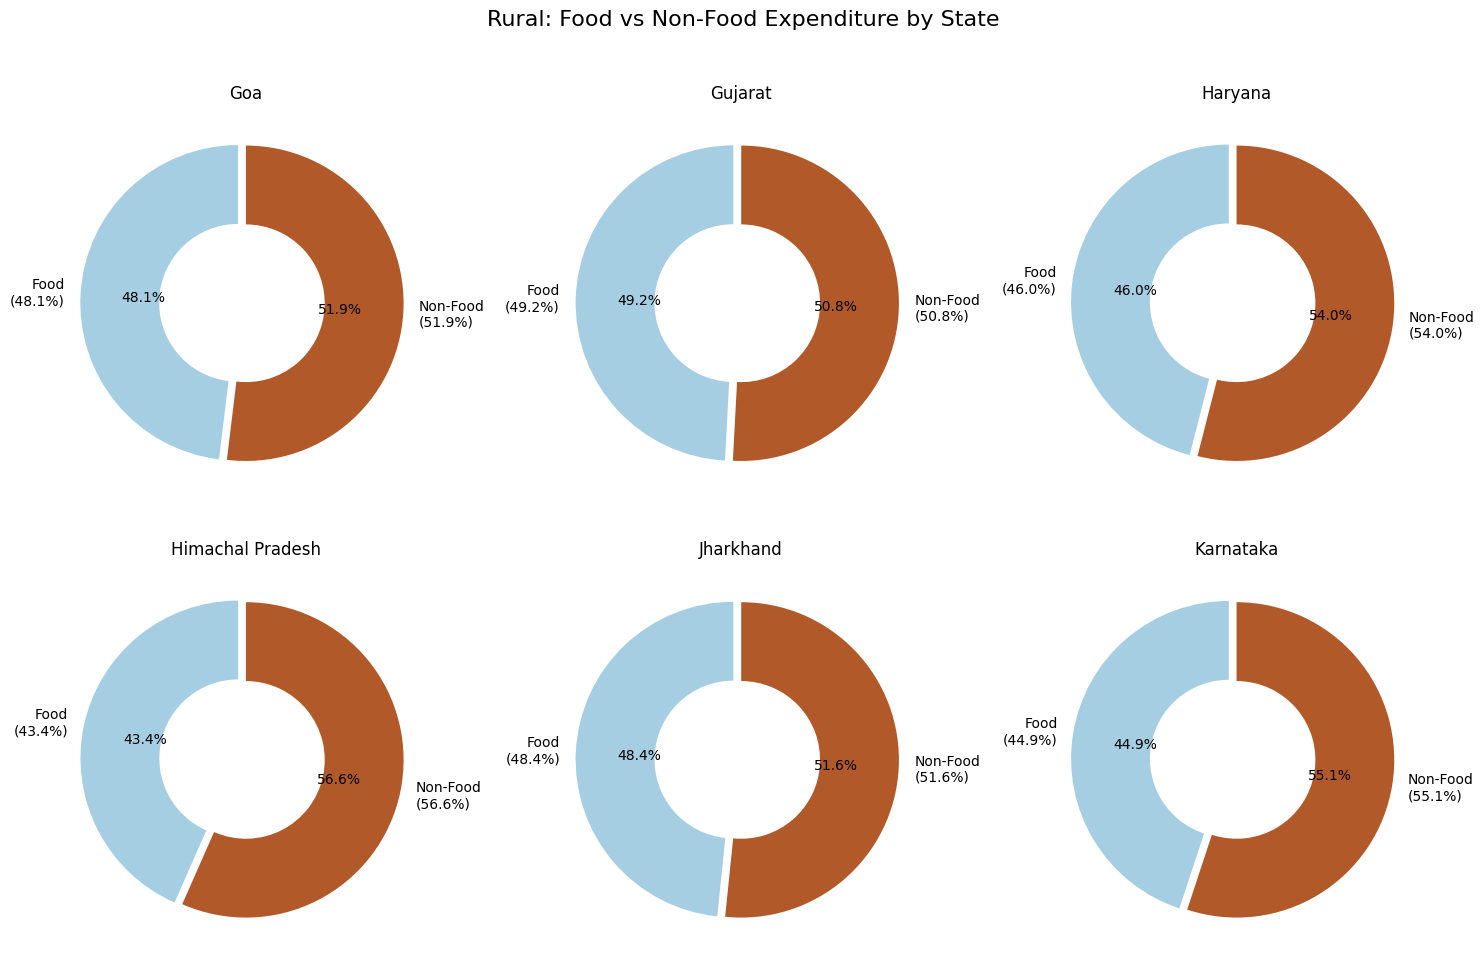

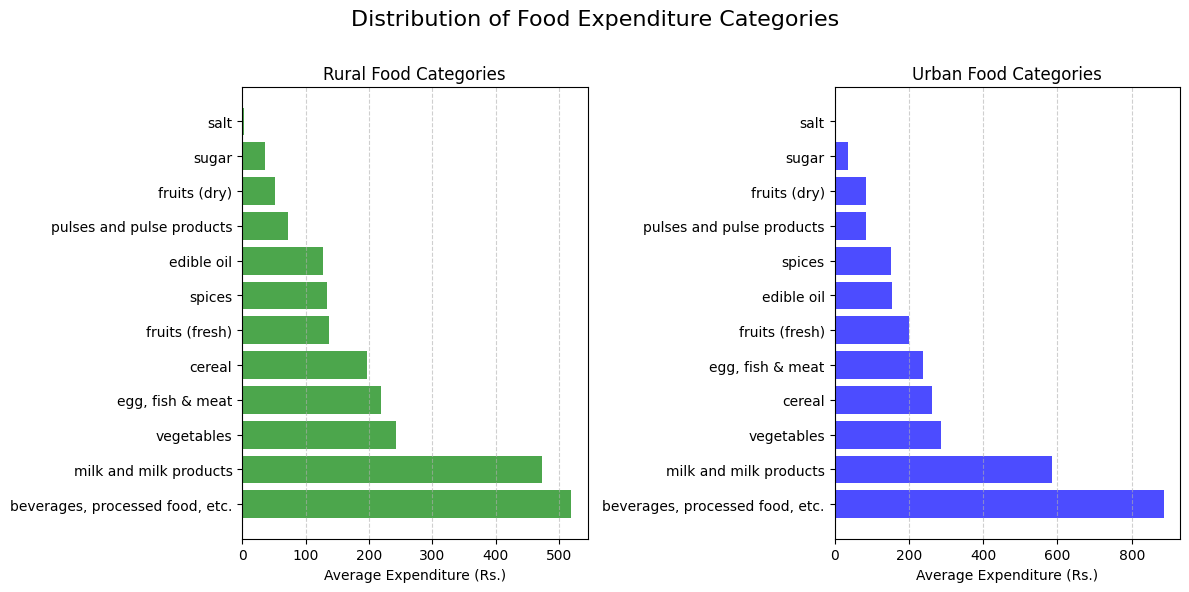

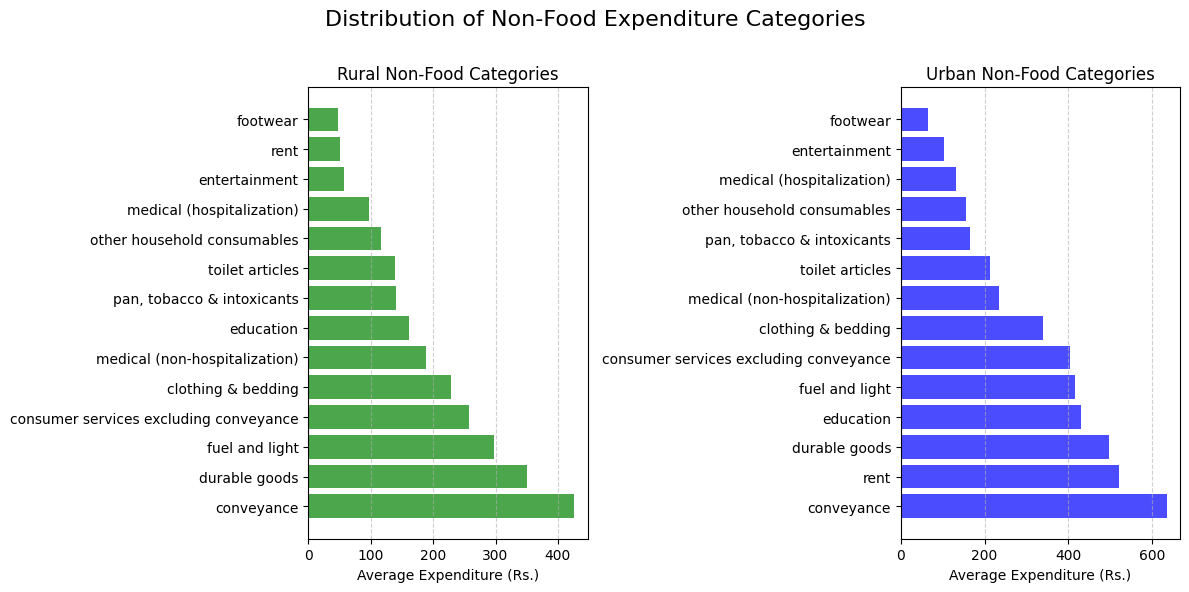

C:\Users\shubham keshari\AppData\Local\Temp\ipykernel_23100\3757847008.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - width/2, rural_bar.get_height() + 100, f'₹{rural_totals[i]:.0f}',
C:\Users\shubham keshari\AppData\Local\Temp\ipykernel_23100\3757847008.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + width/2, urban_bar.get_height() + 100, f'₹{urban_totals[i]:.0f}',


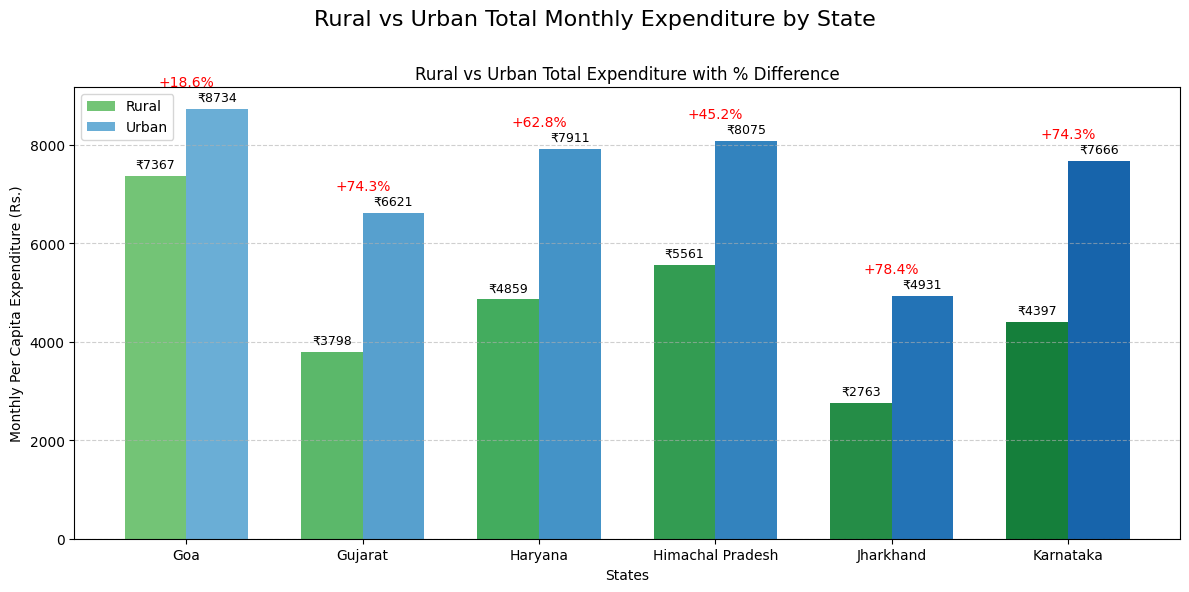

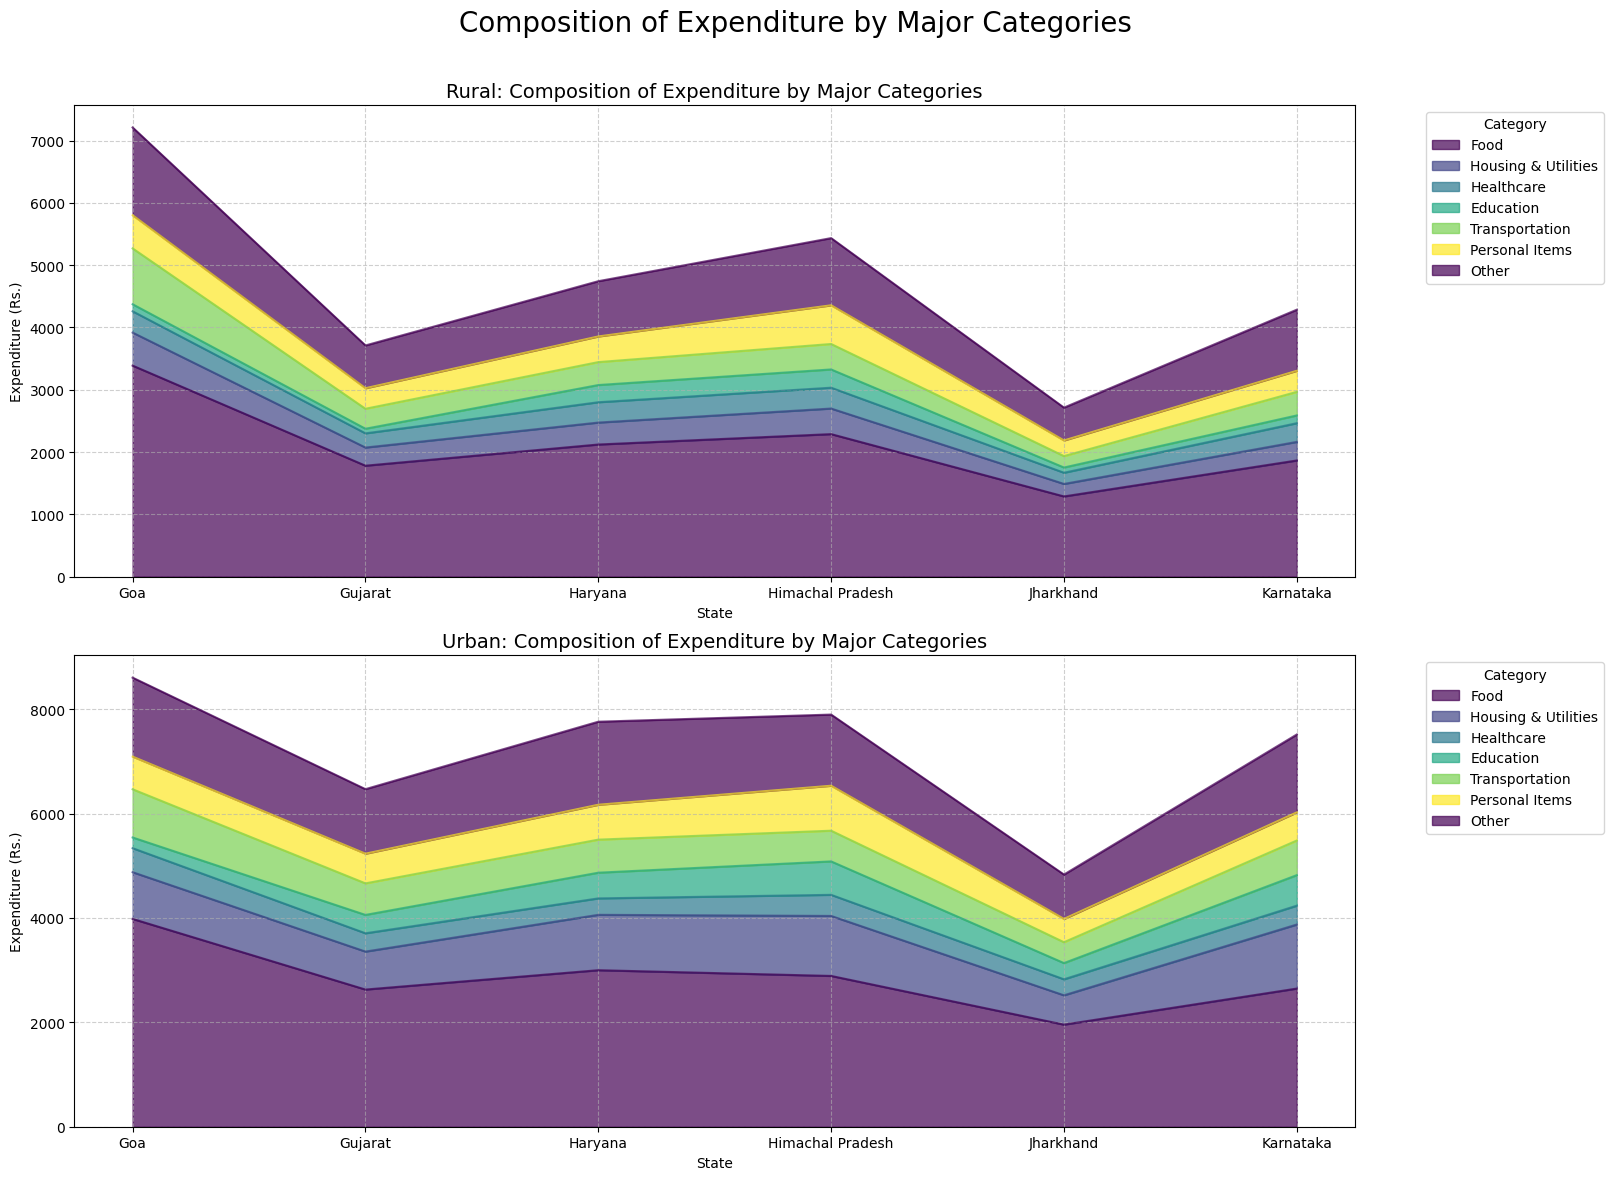

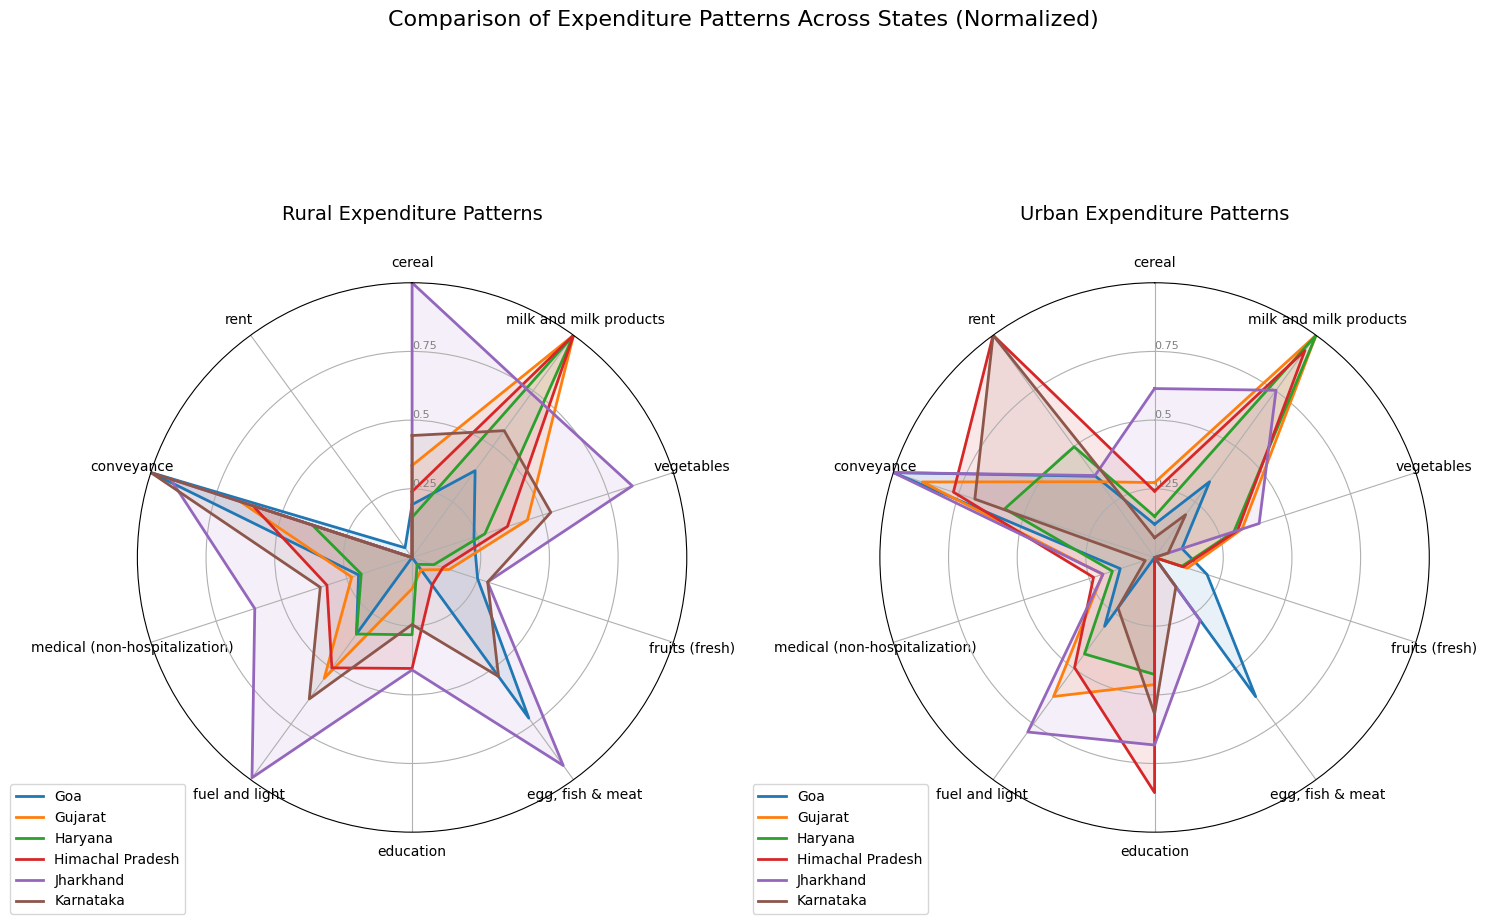

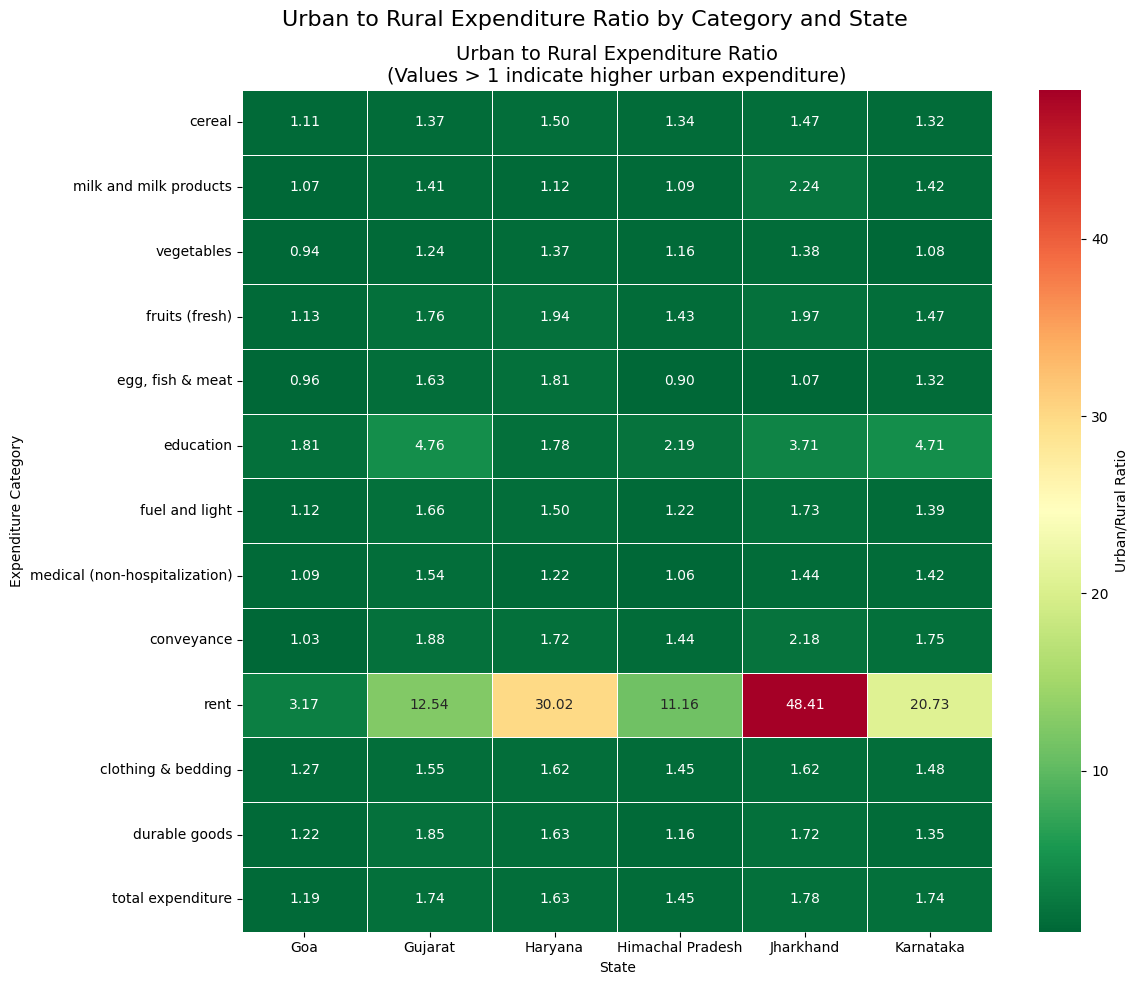

In [18]:
# Make sure necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.patches import Circle

# Assuming rural_df and urban_df are already defined from previous code

# 1. Pie Charts: Urban - Food vs Non-Food expenditure by state
plt.figure(figsize=(15, 10))
plt.suptitle('Urban: Food vs Non-Food Expenditure by State', fontsize=16)

states = urban_df.columns
colors = plt.cm.Paired(np.linspace(0, 1, 2))  # 2 colors for food and non-food

for i, state in enumerate(states):
    plt.subplot(2, 3, i+1)
    
    food = urban_df.loc['food: total', state]
    non_food = urban_df.loc['non-food: total', state]
    total = food + non_food
    
    # Calculate percentages
    food_pct = (food / total) * 100
    non_food_pct = (non_food / total) * 100
    
    labels = [f'Food\n({food_pct:.1f}%)', f'Non-Food\n({non_food_pct:.1f}%)']
    values = [food, non_food]
    
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, shadow=False, explode=(0.05, 0))
    plt.title(f'{state}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 2. Donut Charts: Rural - Food vs Non-Food expenditure by state
plt.figure(figsize=(15, 10))
plt.suptitle('Rural: Food vs Non-Food Expenditure by State', fontsize=16)

for i, state in enumerate(states):
    plt.subplot(2, 3, i+1)
    
    food = rural_df.loc['food: total', state]
    non_food = rural_df.loc['non-food: total', state]
    total = food + non_food
    
    # Calculate percentages
    food_pct = (food / total) * 100
    non_food_pct = (non_food / total) * 100
    
    labels = [f'Food\n({food_pct:.1f}%)', f'Non-Food\n({non_food_pct:.1f}%)']
    values = [food, non_food]
    
    # Create a donut chart
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, shadow=False, explode=(0.05, 0), 
            wedgeprops=dict(width=0.5))  # The wedgeprops makes it a donut
    
    # Add a circle at the center to make it look more like a donut
    centre_circle = Circle((0, 0), 0.25, fc='white')
    plt.gca().add_patch(centre_circle)
    
    plt.title(f'{state}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 3. Histograms: Distribution of expenditure categories
# Histogram 1: Distribution of food expenditure across states for rural and urban
plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of Food Expenditure Categories', fontsize=16)

# Select food categories (excluding totals)
food_categories = [
    'cereal', 'pulses and pulse products', 'sugar', 'salt', 'milk and milk products',
    'vegetables', 'fruits (fresh)', 'fruits (dry)', 'egg, fish & meat', 'edible oil',
    'spices', 'beverages, processed food, etc.'
]

# Average expenditure on each food category across states
rural_food_avg = rural_df.loc[food_categories].mean(axis=1).sort_values(ascending=False)
urban_food_avg = urban_df.loc[food_categories].mean(axis=1).sort_values(ascending=False)

# Plot
plt.subplot(1, 2, 1)
plt.barh(range(len(rural_food_avg)), rural_food_avg.values, color='green', alpha=0.7)
plt.yticks(range(len(rural_food_avg)), rural_food_avg.index)
plt.xlabel('Average Expenditure (Rs.)')
plt.title('Rural Food Categories')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.barh(range(len(urban_food_avg)), urban_food_avg.values, color='blue', alpha=0.7)
plt.yticks(range(len(urban_food_avg)), urban_food_avg.index)
plt.xlabel('Average Expenditure (Rs.)')
plt.title('Urban Food Categories')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Histogram 2: Distribution of non-food expenditure across states for rural and urban
plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of Non-Food Expenditure Categories', fontsize=16)

# Select non-food categories (excluding totals)
non_food_categories = [
    'pan, tobacco & intoxicants', 'fuel and light', 'toilet articles',
    'other household consumables', 'education', 'medical (hospitalization)',
    'medical (non-hospitalization)', 'conveyance',
    'consumer services excluding conveyance', 'entertainment', 'rent',
    'clothing & bedding', 'footwear', 'durable goods'
]

# Average expenditure on each non-food category across states
rural_non_food_avg = rural_df.loc[non_food_categories].mean(axis=1).sort_values(ascending=False)
urban_non_food_avg = urban_df.loc[non_food_categories].mean(axis=1).sort_values(ascending=False)

# Plot
plt.subplot(1, 2, 1)
plt.barh(range(len(rural_non_food_avg)), rural_non_food_avg.values, color='green', alpha=0.7)
plt.yticks(range(len(rural_non_food_avg)), rural_non_food_avg.index)
plt.xlabel('Average Expenditure (Rs.)')
plt.title('Rural Non-Food Categories')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.barh(range(len(urban_non_food_avg)), urban_non_food_avg.values, color='blue', alpha=0.7)
plt.yticks(range(len(urban_non_food_avg)), urban_non_food_avg.index)
plt.xlabel('Average Expenditure (Rs.)')
plt.title('Urban Non-Food Categories')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 4. Rural vs Urban Total Expenditure Bar Chart with Percentages
plt.figure(figsize=(12, 6))
plt.suptitle('Rural vs Urban Total Monthly Expenditure by State', fontsize=16)

rural_totals = rural_df.loc['total expenditure']
urban_totals = urban_df.loc['total expenditure']

# Calculate percentage difference
pct_diff = ((urban_totals - rural_totals) / rural_totals * 100).round(1)

# Plot with custom colors
x = range(len(states))
width = 0.35
colors_rural = plt.cm.Greens(np.linspace(0.5, 0.8, len(states)))
colors_urban = plt.cm.Blues(np.linspace(0.5, 0.8, len(states)))

rural_bars = plt.bar([i - width/2 for i in x], rural_totals, width, label='Rural', color=colors_rural)
urban_bars = plt.bar([i + width/2 for i in x], urban_totals, width, label='Urban', color=colors_urban)

# Add value labels
for i, (rural_bar, urban_bar, diff) in enumerate(zip(rural_bars, urban_bars, pct_diff)):
    plt.text(i - width/2, rural_bar.get_height() + 100, f'₹{rural_totals[i]:.0f}', 
             ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, urban_bar.get_height() + 100, f'₹{urban_totals[i]:.0f}', 
             ha='center', va='bottom', fontsize=9)
    plt.text(i, max(rural_bar.get_height(), urban_bar.get_height()) + 400, 
             f'+{diff}%', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('States')
plt.ylabel('Monthly Per Capita Expenditure (Rs.)')
plt.title('Rural vs Urban Total Expenditure with % Difference')
plt.xticks(x, states)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 5. Stacked Area Chart for category contribution by state
plt.figure(figsize=(16, 12))
plt.suptitle('Composition of Expenditure by Major Categories', fontsize=20)

# Define major categories for cleaner visualization
major_categories = {
    'Food': ['cereal', 'pulses and pulse products', 'milk and milk products', 
             'vegetables', 'fruits (fresh)', 'egg, fish & meat', 'edible oil', 
             'spices', 'beverages, processed food, etc.'],
    'Housing & Utilities': ['fuel and light', 'rent'],
    'Healthcare': ['medical (hospitalization)', 'medical (non-hospitalization)'],
    'Education': ['education'],
    'Transportation': ['conveyance'],
    'Personal Items': ['toilet articles', 'clothing & bedding', 'footwear'],
    'Other': ['pan, tobacco & intoxicants', 'other household consumables', 
              'consumer services excluding conveyance', 'entertainment', 
              'other taxes & cesses', 'durable goods']
}

# Function to aggregate data by major categories
def aggregate_by_major_category(df):
    aggregated_data = {}
    for major_cat, sub_cats in major_categories.items():
        # Filter to include only subcategories that exist in the dataframe
        existing_subcats = [cat for cat in sub_cats if cat in df.index]
        if existing_subcats:
            aggregated_data[major_cat] = df.loc[existing_subcats].sum()
    
    return pd.DataFrame(aggregated_data).T

# Create aggregated data
rural_agg = aggregate_by_major_category(rural_df)
urban_agg = aggregate_by_major_category(urban_df)

# Plot for Rural
plt.subplot(2, 1, 1)
rural_stack = rural_agg.T
colors = plt.cm.viridis(np.linspace(0, 1, len(rural_stack)))
rural_stack.plot(kind='area', stacked=True, color=colors, alpha=0.7, ax=plt.gca())
plt.title('Rural: Composition of Expenditure by Major Categories', fontsize=14)
plt.xlabel('State')
plt.ylabel('Expenditure (Rs.)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.6)

# Plot for Urban
plt.subplot(2, 1, 2)
urban_stack = urban_agg.T
urban_stack.plot(kind='area', stacked=True, color=colors, alpha=0.7, ax=plt.gca())
plt.title('Urban: Composition of Expenditure by Major Categories', fontsize=14)
plt.xlabel('State')
plt.ylabel('Expenditure (Rs.)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()

# 6. Radar Chart to compare expenditure patterns across states
# For this visualization, we'll normalize the data for better comparison
plt.figure(figsize=(15, 10))
plt.suptitle('Comparison of Expenditure Patterns Across States (Normalized)', fontsize=16)

# Define categories for radar chart (select key categories for clarity)
radar_categories = [
    'cereal', 'milk and milk products', 'vegetables', 'fruits (fresh)', 
    'egg, fish & meat', 'education', 'fuel and light', 'medical (non-hospitalization)', 
    'conveyance', 'rent'
]

# Function to normalize data for radar chart
def normalize_for_radar(df, categories, states):
    normalized_data = {}
    for state in states:
        state_data = df.loc[categories, state]
        # Normalize to 0-1 range within each state's data
        normalized_data[state] = (state_data - state_data.min()) / (state_data.max() - state_data.min())
    return pd.DataFrame(normalized_data, index=categories)

# Create normalized data
rural_radar = normalize_for_radar(rural_df, radar_categories, states)
urban_radar = normalize_for_radar(urban_df, radar_categories, states)

# Function to create radar chart
def create_radar_chart(ax, data, title):
    # Number of variables
    N = len(data.index)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], data.index, fontsize=10)
    
    # Draw y-axis labels
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=8)
    plt.ylim(0, 1)
    
    # Plot each state
    for i, state in enumerate(data.columns):
        values = data[state].values.tolist()
        values += values[:1]  # Close the loop
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=state)
        ax.fill(angles, values, alpha=0.1)
    
    # Add title and legend
    plt.title(title, size=14, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Create radar charts
plt.subplot(1, 2, 1, polar=True)
create_radar_chart(plt.gca(), rural_radar, 'Rural Expenditure Patterns')

plt.subplot(1, 2, 2, polar=True)
create_radar_chart(plt.gca(), urban_radar, 'Urban Expenditure Patterns')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 7. Heat Map for Urban-Rural Difference Ratio
plt.figure(figsize=(12, 10))
plt.suptitle('Urban to Rural Expenditure Ratio by Category and State', fontsize=16)

# Calculate the ratio of urban to rural expenditure
ratio_df = urban_df / rural_df

# Select interesting categories for the heatmap
heatmap_categories = [
    'cereal', 'milk and milk products', 'vegetables', 'fruits (fresh)', 
    'egg, fish & meat', 'education', 'fuel and light', 'medical (non-hospitalization)', 
    'conveyance', 'rent', 'clothing & bedding', 'durable goods', 'total expenditure'
]

# Create heatmap
sns.heatmap(ratio_df.loc[heatmap_categories], 
            annot=True, 
            fmt=".2f", 
            cmap="RdYlGn_r",
            cbar_kws={'label': 'Urban/Rural Ratio'},
            linewidths=0.5)

plt.title('Urban to Rural Expenditure Ratio\n(Values > 1 indicate higher urban expenditure)', fontsize=14)
plt.ylabel('Expenditure Category')
plt.xlabel('State')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Note: For a true map visualization of India showing the states, 
# you would need additional libraries like geopandas and a shapefile of Indian states.
# Since that might be beyond the scope of a basic Jupyter notebook, I've included 
# comprehensive visualizations focusing on the data patterns instead.

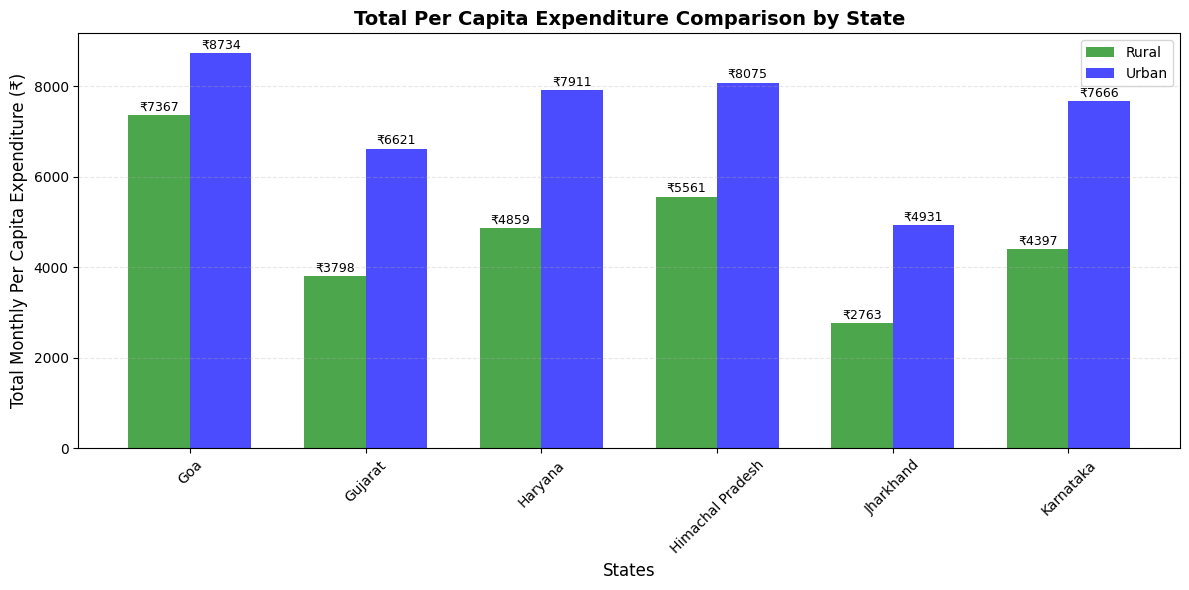

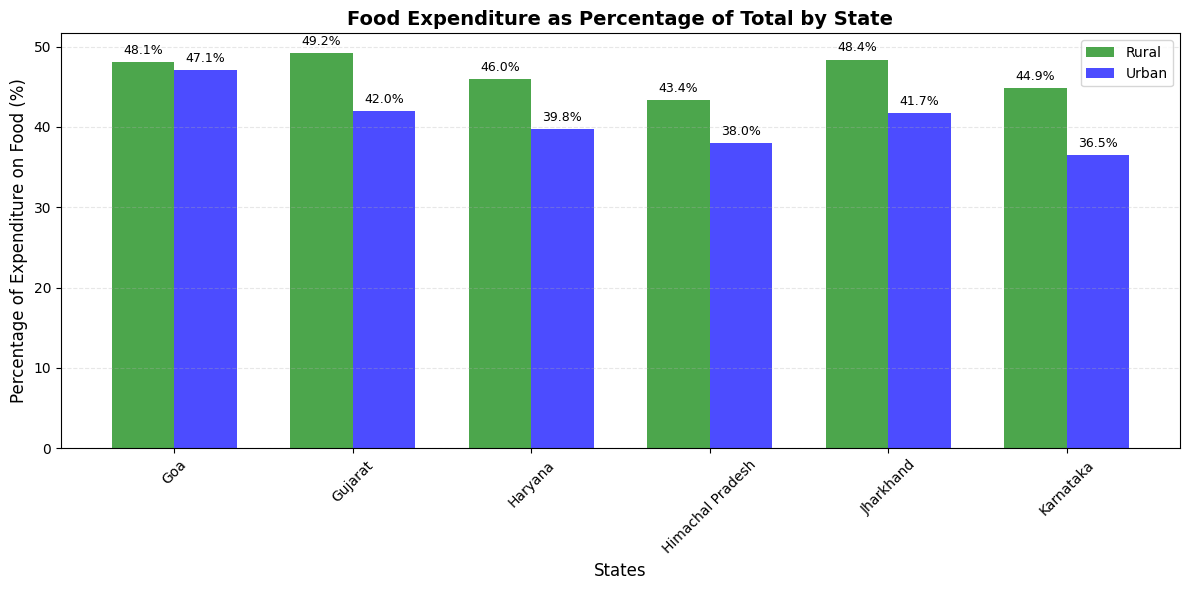

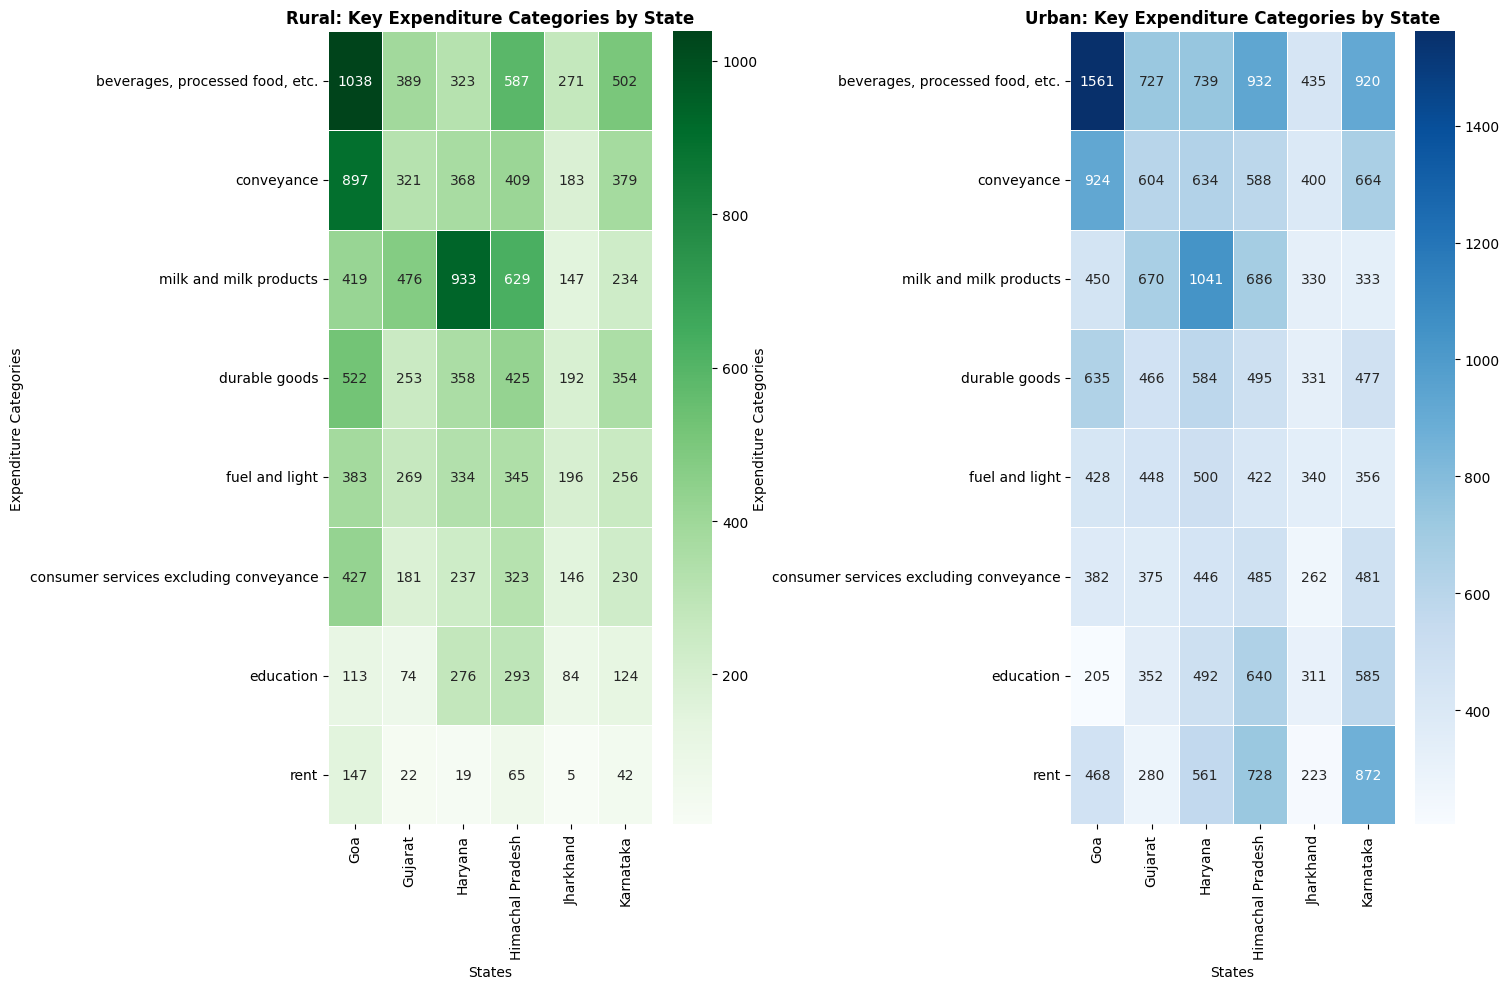

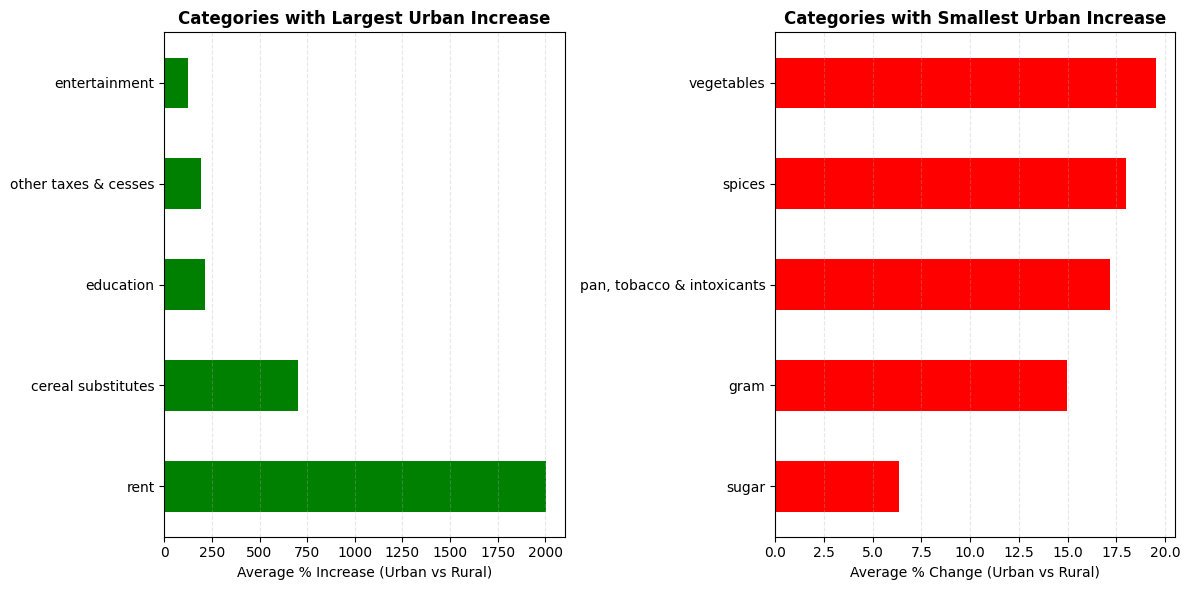

          COMPREHENSIVE ANALYSIS OF EXPENDITURE PATTERNS ACROSS STATES          

1. OVERALL EXPENDITURE PATTERNS
----------------------------------------
• Goa has the highest per capita expenditure in both rural (₹7366.57) and
  urban (₹8733.87) areas, showcasing a affluent lifestyle compared to other states.
• Jharkhand has the lowest expenditure in both rural (₹2763.27) and
  urban (₹4930.99) settings, indicating lower income levels and purchasing power.
• The average urban expenditure (₹7322.87) is approximately
  1.53 times higher than the average rural expenditure (₹4790.86).

2. FOOD EXPENDITURE PATTERNS
----------------------------------------
• Rural households in Gujarat spend the highest proportion (49.2%) of
  their budget on food, suggesting higher food prices or fewer non-food expenses.
• Urban residents in Karnataka allocate the lowest percentage (36.5%) to food,
  indicating greater spending diversity on non-food items like housing and services.
• The rural-urban gap i

In [19]:
# Assuming rural_df and urban_df are already loaded as in previous code

# Function to find the highest expenditure category for each state (excluding totals)
def highest_category_by_state(df):
    # Filter out the total categories
    filtered_df = df.drop(['food: total', 'non-food: total', 'total expenditure'])
    
    # Find the highest category for each state
    highest_categories = {}
    for state in df.columns:
        highest_cat = filtered_df[state].idxmax()
        highest_val = filtered_df.loc[highest_cat, state]
        highest_categories[state] = (highest_cat, highest_val)
    
    return highest_categories

# Function to generate comprehensive state profiles
def generate_state_profile(rural_df, urban_df):
    states = rural_df.columns
    
    # Total expenditure by state
    rural_totals = rural_df.loc['total expenditure']
    urban_totals = urban_df.loc['total expenditure']
    
    # Per capita expenditure chart (Total)
    plt.figure(figsize=(12, 6))
    width = 0.35
    x = np.arange(len(states))
    
    plt.bar(x - width/2, rural_totals, width, label='Rural', color='green', alpha=0.7)
    plt.bar(x + width/2, urban_totals, width, label='Urban', color='blue', alpha=0.7)
    
    plt.xlabel('States', fontsize=12)
    plt.ylabel('Total Monthly Per Capita Expenditure (₹)', fontsize=12)
    plt.title('Total Per Capita Expenditure Comparison by State', fontsize=14, fontweight='bold')
    plt.xticks(x, states, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add values on top of bars
    for i, v in enumerate(rural_totals):
        plt.text(i - width/2, v + 100, f'₹{v:.0f}', ha='center', fontsize=9)
    
    for i, v in enumerate(urban_totals):
        plt.text(i + width/2, v + 100, f'₹{v:.0f}', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Food vs Non-food Expenditure analysis
    rural_food = rural_df.loc['food: total']
    rural_nonfood = rural_df.loc['non-food: total']
    urban_food = urban_df.loc['food: total']
    urban_nonfood = urban_df.loc['non-food: total']
    
    # Calculate food percentage
    rural_food_pct = (rural_food / (rural_food + rural_nonfood) * 100).round(1)
    urban_food_pct = (urban_food / (urban_food + urban_nonfood) * 100).round(1)
    
    # Food percentage chart
    plt.figure(figsize=(12, 6))
    
    plt.bar(x - width/2, rural_food_pct, width, label='Rural', color='green', alpha=0.7)
    plt.bar(x + width/2, urban_food_pct, width, label='Urban', color='blue', alpha=0.7)
    
    plt.xlabel('States', fontsize=12)
    plt.ylabel('Percentage of Expenditure on Food (%)', fontsize=12)
    plt.title('Food Expenditure as Percentage of Total by State', fontsize=14, fontweight='bold')
    plt.xticks(x, states, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add percentage values on top of bars
    for i, v in enumerate(rural_food_pct):
        plt.text(i - width/2, v + 1, f'{v}%', ha='center', fontsize=9)
    
    for i, v in enumerate(urban_food_pct):
        plt.text(i + width/2, v + 1, f'{v}%', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Find highest expenditure categories
    rural_highest = highest_category_by_state(rural_df)
    urban_highest = highest_category_by_state(urban_df)
    
    # Heatmap of key categories (top 8 overall)
    def get_key_categories(rural_df, urban_df, n=8):
        # Filter out the total categories
        filtered_rural = rural_df.drop(['food: total', 'non-food: total', 'total expenditure'])
        filtered_urban = urban_df.drop(['food: total', 'non-food: total', 'total expenditure'])
        
        # Sum across all states for each category
        rural_sum = filtered_rural.sum(axis=1)
        urban_sum = filtered_urban.sum(axis=1)
        total_sum = rural_sum + urban_sum
        
        # Get top N categories
        top_categories = total_sum.nlargest(n).index.tolist()
        return top_categories
    
    key_categories = get_key_categories(rural_df, urban_df)
    
    # Create heatmaps for these key categories
    plt.figure(figsize=(15, 10))
    
    # Rural heatmap
    plt.subplot(1, 2, 1)
    rural_heatmap_data = rural_df.loc[key_categories]
    sns.heatmap(rural_heatmap_data, annot=True, fmt='.0f', cmap='Greens', linewidths=.5)
    plt.title('Rural: Key Expenditure Categories by State', fontsize=12, fontweight='bold')
    plt.ylabel('Expenditure Categories')
    plt.xlabel('States')
    
    # Urban heatmap
    plt.subplot(1, 2, 2)
    urban_heatmap_data = urban_df.loc[key_categories]
    sns.heatmap(urban_heatmap_data, annot=True, fmt='.0f', cmap='Blues', linewidths=.5)
    plt.title('Urban: Key Expenditure Categories by State', fontsize=12, fontweight='bold')
    plt.ylabel('Expenditure Categories')
    plt.xlabel('States')
    
    plt.tight_layout()
    plt.show()
    
    # Category with biggest rural-urban difference
    def get_biggest_difference_categories(rural_df, urban_df):
        # Filter out the total categories
        filtered_rural = rural_df.drop(['food: total', 'non-food: total', 'total expenditure'])
        filtered_urban = urban_df.drop(['food: total', 'non-food: total', 'total expenditure'])
        
        # Calculate the average difference as percentage for each category
        avg_diff = {}
        for category in filtered_rural.index:
            rural_vals = filtered_rural.loc[category]
            urban_vals = filtered_urban.loc[category]
            # Calculate the percentage difference relative to rural
            pct_diff = ((urban_vals - rural_vals) / rural_vals * 100).mean()
            avg_diff[category] = pct_diff
        
        # Convert to Series for easier sorting
        avg_diff_series = pd.Series(avg_diff)
        return avg_diff_series.nlargest(5), avg_diff_series.nsmallest(5)
    
    biggest_increases, biggest_decreases = get_biggest_difference_categories(rural_df, urban_df)
    
    # Plot the categories with biggest differences
    plt.figure(figsize=(12, 6))
    
    # Plot increases
    plt.subplot(1, 2, 1)
    biggest_increases.plot(kind='barh', color='green')
    plt.title('Categories with Largest Urban Increase', fontsize=12, fontweight='bold')
    plt.xlabel('Average % Increase (Urban vs Rural)')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    # Plot decreases/smallest increases
    plt.subplot(1, 2, 2)
    biggest_decreases.plot(kind='barh', color='red')
    plt.title('Categories with Smallest Urban Increase', fontsize=12, fontweight='bold')
    plt.xlabel('Average % Change (Urban vs Rural)')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Generate text conclusions
    print("="*80)
    print("COMPREHENSIVE ANALYSIS OF EXPENDITURE PATTERNS ACROSS STATES".center(80))
    print("="*80)
    
    # Overall expenditure analysis
    highest_rural_state = rural_totals.idxmax()
    lowest_rural_state = rural_totals.idxmin()
    highest_urban_state = urban_totals.idxmax()
    lowest_urban_state = urban_totals.idxmin()
    
    print("\n1. OVERALL EXPENDITURE PATTERNS")
    print("-"*40)
    print(f"• Goa has the highest per capita expenditure in both rural (₹{rural_totals['Goa']:.2f}) and")
    print(f"  urban (₹{urban_totals['Goa']:.2f}) areas, showcasing a affluent lifestyle compared to other states.")
    print(f"• Jharkhand has the lowest expenditure in both rural (₹{rural_totals['Jharkhand']:.2f}) and")
    print(f"  urban (₹{urban_totals['Jharkhand']:.2f}) settings, indicating lower income levels and purchasing power.")
    print(f"• The average urban expenditure (₹{urban_totals.mean():.2f}) is approximately") 
    print(f"  {(urban_totals.mean()/rural_totals.mean()).round(2)} times higher than the average rural expenditure (₹{rural_totals.mean():.2f}).")
    
    # Food expenditure analysis
    highest_food_pct_rural_state = rural_food_pct.idxmax()
    lowest_food_pct_rural_state = rural_food_pct.idxmin()
    highest_food_pct_urban_state = urban_food_pct.idxmax()
    lowest_food_pct_urban_state = urban_food_pct.idxmin()
    
    print("\n2. FOOD EXPENDITURE PATTERNS")
    print("-"*40)
    print(f"• Rural households in {highest_food_pct_rural_state} spend the highest proportion ({rural_food_pct[highest_food_pct_rural_state]}%) of")
    print(f"  their budget on food, suggesting higher food prices or fewer non-food expenses.")
    print(f"• Urban residents in {lowest_food_pct_urban_state} allocate the lowest percentage ({urban_food_pct[lowest_food_pct_urban_state]}%) to food,")
    print(f"  indicating greater spending diversity on non-food items like housing and services.")
    print(f"• The rural-urban gap in food expenditure percentage is largest in {(rural_food_pct - urban_food_pct).idxmax()}")
    print(f"  ({(rural_food_pct - urban_food_pct).max():.1f} percentage points), highlighting significant lifestyle differences.")
    
    # Key category insights
    print("\n3. KEY EXPENDITURE CATEGORY INSIGHTS")
    print("-"*40)
    
    # Highlight the highest category for each state
    print("Highest expenditure categories by state (excluding totals):")
    for state in states:
        rural_cat, rural_val = rural_highest[state]
        urban_cat, urban_val = urban_highest[state]
        print(f"• {state}:")
        print(f"  - Rural: {rural_cat} (₹{rural_val:.2f})")
        print(f"  - Urban: {urban_cat} (₹{urban_val:.2f})")
    
    # Rural-Urban transition insights
    print("\n4. RURAL-URBAN TRANSITION INSIGHTS")
    print("-"*40)
    print(f"• Urban areas show dramatically higher spending on {biggest_increases.index[0]}")
    print(f"  ({biggest_increases.iloc[0]:.1f}% higher than rural areas on average).")
    print(f"• {biggest_increases.index[1]} and {biggest_increases.index[2]} also see substantial increases")
    print(f"  in urban settings, reflecting urban lifestyle priorities.")
    print(f"• The smallest urban-rural differences are seen in {biggest_decreases.index[0]}")
    print(f"  and {biggest_decreases.index[1]}, suggesting these are basic necessities")
    print(f"  with similar consumption patterns regardless of location.")
    
    # State-specific observations
    print("\n5. STATE-SPECIFIC OBSERVATIONS")
    print("-"*40)
    
    # Haryana milk consumption
    if 'milk and milk products' in rural_df.index and 'Haryana' in rural_df.columns:
        haryana_rural_milk = rural_df.loc['milk and milk products', 'Haryana']
        haryana_urban_milk = urban_df.loc['milk and milk products', 'Haryana']
        avg_rural_milk = rural_df.loc['milk and milk products'].mean()
        avg_urban_milk = urban_df.loc['milk and milk products'].mean()
        
        print(f"• Haryana shows exceptional spending on milk and milk products (Rural: ₹{haryana_rural_milk:.2f},")
        print(f"  Urban: ₹{haryana_urban_milk:.2f}), which is {(haryana_rural_milk/avg_rural_milk).round(1)} times the average rural")
        print(f"  spending and {(haryana_urban_milk/avg_urban_milk).round(1)} times the average urban spending on this category.")
    
    # Goa's unique patterns
    if 'egg, fish & meat' in rural_df.index and 'Goa' in rural_df.columns:
        goa_rural_meat = rural_df.loc['egg, fish & meat', 'Goa']
        avg_rural_meat = rural_df.loc['egg, fish & meat'].mean()
        
        print(f"• Goa's rural areas show distinctly high expenditure on egg, fish & meat (₹{goa_rural_meat:.2f}),")
        print(f"  which is {(goa_rural_meat/avg_rural_meat).round(1)} times the average, reflecting the coastal state's dietary preferences.")
    
    # Education spending
    if 'education' in rural_df.index:
        highest_edu_urban_state = urban_df.loc['education'].idxmax()
        highest_edu_urban = urban_df.loc['education', highest_edu_urban_state]
        lowest_edu_urban_state = urban_df.loc['education'].idxmin()
        lowest_edu_urban = urban_df.loc['education', lowest_edu_urban_state]
        
        print(f"• {highest_edu_urban_state} leads in urban education spending (₹{highest_edu_urban:.2f}), while")
        print(f"  {lowest_edu_urban_state} spends the least (₹{lowest_edu_urban:.2f}), representing significant")
        print(f"  differences in educational investment and priorities.")
    
    # Rural-Urban gap
    largest_gap_state = (urban_totals - rural_totals).idxmax()
    largest_gap = (urban_totals - rural_totals).max()
    smallest_gap_state = (urban_totals - rural_totals).idxmin()
    smallest_gap = (urban_totals - rural_totals).min()
    
    print(f"• The rural-urban expenditure gap is largest in {largest_gap_state} (₹{largest_gap:.2f})")
    print(f"  and smallest in {smallest_gap_state} (₹{smallest_gap:.2f}), indicating varying degrees")
    print(f"  of economic disparity between rural and urban areas across states.")
    
    print("\n6. CONCLUSION")
    print("-"*40)
    print("The expenditure patterns reveal significant economic and lifestyle differences across")
    print("states and between rural and urban areas. Goa consistently shows higher spending,")
    print("while Jharkhand exhibits more modest consumption patterns. Urban areas universally")
    print("show higher expenditure, but the magnitude varies considerably by state.")
    print("")
    print("Food remains a more significant portion of budgets in rural areas, while urban")
    print("residents allocate more to services, education, and housing. These patterns reflect")
    print("the economic development, cultural preferences, and lifestyle differences that")
    print("characterize India's diverse states.")

# Run the analysis
generate_state_profile(rural_df, urban_df)